## 1) Prepare a classification model using SVM for salary data 

Data Description:

age -- age of a person

workclass	-- A work class is a grouping of work 

education	-- Education of an individuals	

maritalstatus -- Marital status of an individulas

occupation	 -- occupation of an individuals

relationship -- 	

race --  Race of an Individual

sex --  Gender of an Individual

capitalgain --  profit received from the sale of an investment	

capitalloss	-- A decrease in the value of a capital asset

hoursperweek -- number of hours work per week	

native -- Native of an individual

Salary -- salary of an individual


In [48]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
# Import dataset
train_data = pd.read_csv("SalaryData_Train(1).csv")
test_data = pd.read_csv("SalaryData_Test(1).csv")

In [3]:
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [5]:
# data conversion 
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder

In [6]:
str_s = [['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'native']]

In [7]:
oe = OrdinalEncoder()

In [8]:
for i in str_s:
    train_data[i] = oe.fit_transform(train_data[i])
    test_data[i] =oe.fit_transform(test_data[i])

In [9]:
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5.0,9.0,13,4.0,0.0,1.0,4.0,1.0,2174,0,40,37.0,<=50K
1,50,4.0,9.0,13,2.0,3.0,0.0,4.0,1.0,0,0,13,37.0,<=50K
2,38,2.0,11.0,9,0.0,5.0,1.0,4.0,1.0,0,0,40,37.0,<=50K
3,53,2.0,1.0,7,2.0,5.0,0.0,2.0,1.0,0,0,40,37.0,<=50K
4,28,2.0,9.0,13,2.0,9.0,5.0,2.0,0.0,0,0,40,4.0,<=50K


In [10]:
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2.0,1.0,7,4.0,6.0,3.0,2.0,1.0,0,0,40,37.0,<=50K
1,38,2.0,11.0,9,2.0,4.0,0.0,4.0,1.0,0,0,50,37.0,<=50K
2,28,1.0,7.0,12,2.0,10.0,0.0,4.0,1.0,0,0,40,37.0,>50K
3,44,2.0,15.0,10,2.0,6.0,0.0,2.0,1.0,7688,0,40,37.0,>50K
4,34,2.0,0.0,6,4.0,7.0,1.0,4.0,1.0,0,0,30,37.0,<=50K


In [11]:
mapping = {' >50K': 1, ' <=50K': 2}

In [12]:
train_data = train_data.replace({'Salary': mapping})
test_data = test_data.replace({'Salary': mapping})

In [13]:
df = train_data.append(test_data)

C:\Users\Sachin\AppData\Local\Temp\ipykernel_22352\3604389877.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = train_data.append(test_data)


In [14]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5.0,9.0,13,4.0,0.0,1.0,4.0,1.0,2174,0,40,37.0,2
1,50,4.0,9.0,13,2.0,3.0,0.0,4.0,1.0,0,0,13,37.0,2
2,38,2.0,11.0,9,0.0,5.0,1.0,4.0,1.0,0,0,40,37.0,2
3,53,2.0,1.0,7,2.0,5.0,0.0,2.0,1.0,0,0,40,37.0,2
4,28,2.0,9.0,13,2.0,9.0,5.0,2.0,0.0,0,0,40,4.0,2


In [16]:
df.shape

(45221, 14)

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45221.0,38.548086,13.217981,17.0,28.0,37.0,47.0,90.0
workclass,45221.0,2.204507,0.958132,0.0,2.0,2.0,2.0,6.0
education,45221.0,10.313217,3.816992,0.0,9.0,11.0,12.0,15.0
educationno,45221.0,10.118463,2.552909,1.0,9.0,10.0,13.0,16.0
maritalstatus,45221.0,2.585148,1.500460,0.0,2.0,2.0,4.0,6.0
occupation,45221.0,5.969572,4.026444,0.0,2.0,6.0,9.0,13.0
relationship,45221.0,1.412684,1.597242,0.0,0.0,1.0,3.0,5.0
race,45221.0,3.680281,0.832361,0.0,4.0,4.0,4.0,4.0
sex,45221.0,0.675062,0.468357,0.0,0.0,1.0,1.0,1.0
capitalgain,45221.0,1101.454700,7506.511295,0.0,0.0,0.0,0.0,99999.0


In [20]:
df[df.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,2.0,9.0,13,2.0,3.0,0.0,4.0,1.0,0,0,40,37.0,1
364,27,2.0,9.0,13,4.0,2.0,1.0,4.0,1.0,0,0,50,37.0,2
518,24,2.0,11.0,9,4.0,5.0,4.0,2.0,0.0,0,0,40,37.0,2
525,24,2.0,11.0,9,4.0,2.0,3.0,4.0,1.0,0,0,40,37.0,2
619,33,2.0,9.0,13,2.0,3.0,0.0,4.0,1.0,0,0,40,37.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15044,22,2.0,15.0,10,4.0,2.0,3.0,4.0,1.0,0,0,40,37.0,2
15049,32,2.0,11.0,9,2.0,5.0,0.0,4.0,1.0,0,0,40,37.0,2
15052,31,2.0,11.0,9,2.0,2.0,0.0,4.0,1.0,0,0,40,37.0,2
15053,25,2.0,11.0,9,4.0,7.0,3.0,4.0,0.0,0,0,40,37.0,2


In [21]:
df.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [22]:
df.corr()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
age,1.000000,0.085890,-0.003497,0.037623,-0.271616,-0.004474,-0.247561,0.023781,0.082040,0.079682,0.059426,0.101992,-0.002879,-0.237035
workclass,0.085890,1.000000,0.017852,0.040778,-0.033217,0.017508,-0.065048,0.049767,0.069633,0.034542,0.008261,0.051366,0.003889,-0.015657
education,-0.003497,0.017852,1.000000,0.347451,-0.041547,-0.033500,-0.013190,0.011446,-0.027531,0.029893,0.016740,0.060890,0.078800,-0.081214
educationno,0.037623,0.040778,0.347451,1.000000,-0.064986,0.089686,-0.088431,0.031655,0.003416,0.126907,0.081741,0.146206,0.094125,-0.332801
maritalstatus,-0.271616,-0.033217,-0.041547,-0.064986,1.000000,0.016399,0.180430,-0.070311,-0.119982,-0.042397,-0.034940,-0.183178,-0.022880,0.192701
occupation,-0.004474,0.017508,-0.033500,0.089686,0.016399,1.000000,-0.051644,-0.000026,0.056626,0.019435,0.015271,0.016160,-0.002628,-0.049788
relationship,-0.247561,-0.065048,-0.013190,-0.088431,0.180430,-0.051644,1.000000,-0.118588,-0.582977,-0.056817,-0.058485,-0.259194,-0.007016,0.253399
race,0.023781,0.049767,0.011446,0.031655,-0.070311,-0.000026,-0.118588,1.000000,0.088949,0.014079,0.020917,0.044739,0.126192,-0.070849
sex,0.082040,0.069633,-0.027531,0.003416,-0.119982,0.056626,-0.582977,0.088949,1.000000,0.047441,0.046639,0.231427,-0.004653,-0.215748
capitalgain,0.079682,0.034542,0.029893,0.126907,-0.042397,0.019435,-0.056817,0.014079,0.047441,1.000000,-0.032095,0.083880,0.007641,-0.221033


In [31]:
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=200

<AxesSubplot:>

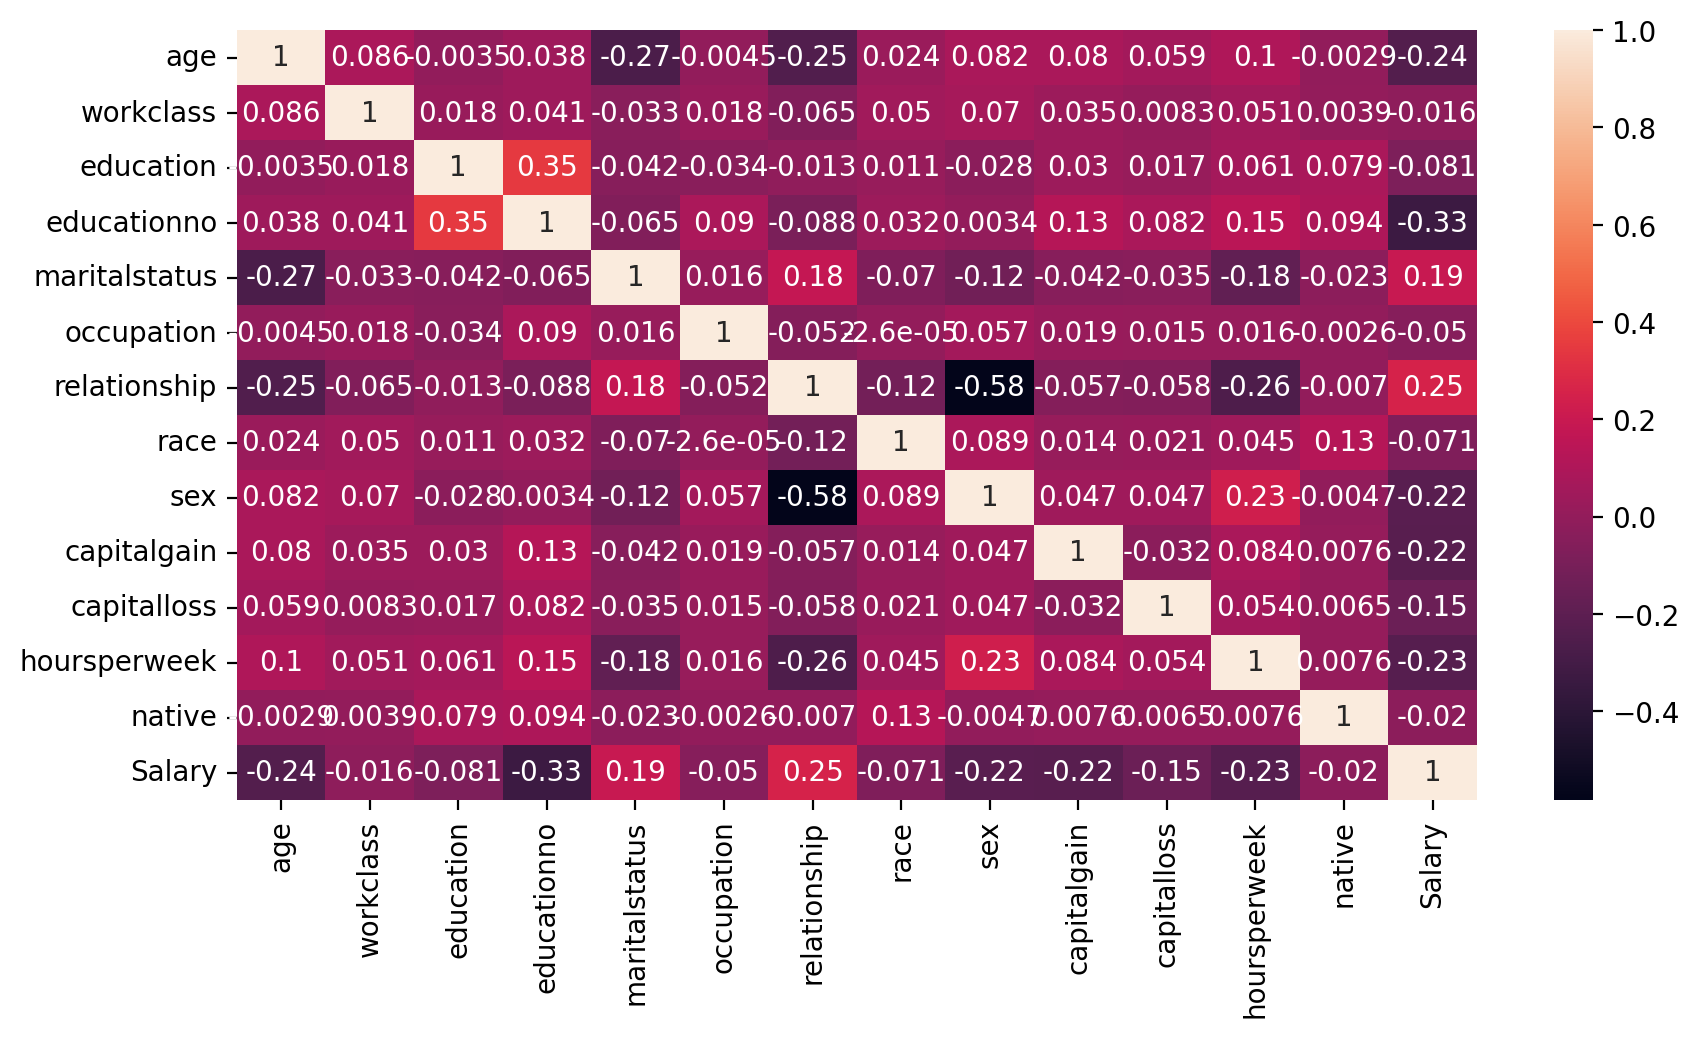

In [32]:
sns.heatmap(df.corr(),annot=True)

In [35]:
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5.0,9.0,13,4.0,0.0,1.0,4.0,1.0,2174,0,40,37.0,2
1,50,4.0,9.0,13,2.0,3.0,0.0,4.0,1.0,0,0,13,37.0,2
2,38,2.0,11.0,9,0.0,5.0,1.0,4.0,1.0,0,0,40,37.0,2
3,53,2.0,1.0,7,2.0,5.0,0.0,2.0,1.0,0,0,40,37.0,2
4,28,2.0,9.0,13,2.0,9.0,5.0,2.0,0.0,0,0,40,4.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2.0,9.0,13,4.0,9.0,3.0,4.0,1.0,0,0,40,37.0,2
15056,39,2.0,9.0,13,0.0,9.0,1.0,4.0,0.0,0,0,36,37.0,2
15057,38,2.0,9.0,13,2.0,9.0,0.0,4.0,1.0,0,0,50,37.0,2
15058,44,2.0,9.0,13,0.0,0.0,3.0,1.0,1.0,5455,0,40,37.0,2


In [37]:
col = df.columns

In [39]:
x_train = train_data[col[0:13]]
y_train = train_data[col[13]]
x_test = test_data[col[0:13]]
y_test = test_data[col[13]]

In [40]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [41]:
x_train = norm_func(x_train)
x_test =  norm_func(x_test)

### Linear kernal

In [49]:
model_linear = SVC(kernel = "linear")
model_linear.fit(x_train,y_train)
pred_test_linear = model_linear.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_linear))

Accuracy: 0.8097609561752988


### Polynomial kernal

In [50]:
model_poly = SVC(kernel = "poly")
model_poly.fit(x_train,y_train)
pred_test_poly = model_poly.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_poly))

Accuracy: 0.8435590969455511


### RBF kernal 

In [51]:
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(x_train,y_train)
pred_test_rbf = model_rbf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_rbf))

Accuracy: 0.8432934926958832


### sigmoid kernal 

In [52]:
model_sigmoid = SVC(kernel = "sigmoid")
model_sigmoid.fit(x_train,y_train)
pred_test_sigmoid = model_sigmoid.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_sigmoid))

Accuracy: 0.5768924302788845


## inference:
### polynomial and RBF kernal gives best accuracy that is 84%